In [1]:
import numpy as np
import pandas as pd


# cleaning data and modifying

In [2]:
nursery_data=pd.read_csv("nursery.csv",header=None)

In [3]:
nursery_data.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
nursery_data.shape

(12960, 9)

In [5]:
nursery_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [6]:
nursery_data.columns=["parents","has_nurs","form","children","housing","finance","social","health","class"]
nursery_data.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


# handling categorical data

In [7]:
cols=["parents","has_nurs","form","children","housing","finance","social","health","class"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    nursery_data[i]=le.fit_transform(nursery_data[i])
nursery_data.head()   

,parents,has_nurs,form,children,housing,finance,social,health,class
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1


# target data and the data for training and testing

In [8]:
#target
target=nursery_data["class"]
target.shape

(12960,)

In [9]:
#data
data=nursery_data.drop(columns=["class"])
data.shape

(12960, 8)

# partitioning the data

In [10]:
##partioning of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3)

In [11]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9072, 8) (3888, 8) (9072,) (3888,)


# standard scaler for the accuracy

In [12]:
x_train.describe()

,parents,has_nurs,form,children,housing,finance,social,health
count,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.00000,9072.000000
mean,1.007716,1.990741,1.501102,1.487434,1.001653,0.501874,0.99526,1.002425
std,0.815424,1.409733,1.116615,1.115063,0.814580,0.500024,0.81754,0.815998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.00000,2.000000
max,2.000000,4.000000,3.000000,3.000000,2.000000,1.000000,2.00000,2.000000


In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 2406 to 6574
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parents   9072 non-null   int32
 1   has_nurs  9072 non-null   int32
 2   form      9072 non-null   int32
 3   children  9072 non-null   int32
 4   housing   9072 non-null   int32
 5   finance   9072 non-null   int32
 6   social    9072 non-null   int32
 7   health    9072 non-null   int32
dtypes: int32(8)
memory usage: 354.4 KB


In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=pd.DataFrame(sc.fit_transform(x_train))
x_train_sc.describe()


,0,1,2,3,4,5,6,7
count,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03
mean,1.284491e-16,8.380519e-17,-7.636455e-18,5.325938e-17,1.143510e-16,1.785756e-16,1.266868e-16,-1.304071e-16
std,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,-1.235886e+00,-1.412218e+00,-1.344407e+00,-1.334020e+00,-1.229724e+00,-1.003755e+00,-1.217451e+00,-1.228533e+00
25%,-1.235886e+00,-7.028249e-01,-4.487938e-01,-1.334020e+00,-1.229724e+00,-1.003755e+00,-1.217451e+00,-1.228533e+00
50%,-9.463141e-03,6.568457e-03,4.468193e-01,-4.371598e-01,-2.029918e-03,9.962592e-01,5.798030e-03,-2.972040e-03
75%,1.216960e+00,7.159618e-01,4.468193e-01,4.597000e-01,1.225664e+00,9.962592e-01,1.229048e+00,1.222589e+00
max,1.216960e+00,1.425355e+00,1.342432e+00,1.356560e+00,1.225664e+00,9.962592e-01,1.229048e+00,1.222589e+00


In [15]:
x_test_sc=pd.DataFrame(sc.fit_transform(x_test))
x_test_sc.describe()

,0,1,2,3,4,5,6,7
count,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03
mean,1.206168e-16,8.041121e-17,2.741291e-17,-1.096517e-17,-3.655055e-18,-2.193033e-17,-1.178755e-16,-2.010280e-17
std,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00
min,-1.199289e+00,-1.419109e+00,-1.335229e+00,-1.359962e+00,-1.213265e+00,-9.912930e-01,-1.242003e+00,-1.215969e+00
25%,-1.199289e+00,-7.171376e-01,-1.335229e+00,-4.707033e-01,-1.213265e+00,-9.912930e-01,-1.242003e+00,-1.215969e+00
50%,2.198802e-02,-1.516605e-02,-4.435474e-01,4.185554e-01,4.698935e-03,-9.912930e-01,-1.358589e-02,6.919636e-03
75%,1.243265e+00,6.868055e-01,1.339816e+00,1.307814e+00,1.222663e+00,1.008783e+00,1.214832e+00,1.229808e+00
max,1.243265e+00,1.388777e+00,1.339816e+00,1.307814e+00,1.222663e+00,1.008783e+00,1.214832e+00,1.229808e+00


# modelling the data

# perceptron

In [16]:
##perceptron
from sklearn.linear_model import Perceptron
p=Perceptron()
p.fit(x_train_sc,y_train)

Perceptron()

In [17]:
from sklearn.metrics import accuracy_score
x_train_pred = p.predict(x_train_sc)
x_test_pred=p.predict(x_test_sc)
print("Training accuracy:",accuracy_score(x_train_pred,y_train))
print("Testing accuracy:",accuracy_score(x_test_pred,y_test))


Training accuracy: 0.7181437389770723
Testing accuracy: 0.7381687242798354


# logistic regression


In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sc,y_train)

C:\Users\SHASHANK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
x_train_pred=lr.predict(x_train_sc)
x_test_pred=lr.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.7678571428571429
testing accuracy: 0.7615740740740741


# SVM

In [20]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_sc,y_train)

SVC()

In [21]:
x_train_pred=svc.predict(x_train_sc)
x_test_pred=svc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("training accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.9620811287477954
training accuracy: 0.9524176954732511


In [22]:
#kernel poly
svc1=SVC(kernel='poly')
svc1.fit(x_train_sc,y_train)

SVC(kernel='poly')

In [23]:
x_train_pred=svc1.predict(x_train_sc)
x_test_pred=svc1.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("training accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.8984788359788359
training accuracy: 0.882201646090535


In [24]:
#kernal linear
svc2=SVC(kernel='linear')
svc2.fit(x_train_sc,y_train)

SVC(kernel='linear')

In [25]:
svm_lin_train_pred=svc2.predict(x_train_sc)
svm_lin_test_pred=svc2.predict(x_test_sc)
print("training accuracy:",accuracy_score(svm_lin_train_pred,y_train))
print("testing accuracy:",accuracy_score(svm_lin_test_pred,y_test))

training accuracy: 0.7671957671957672
testing accuracy: 0.7659465020576132


# decision tree classifier 

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()        #default it is gini
dt1.fit(x_train_sc,y_train)

DecisionTreeClassifier()

In [27]:
x_train_pred=dt1.predict(x_train_sc)
x_test_pred=dt1.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 1.0
testing accuracy: 0.9943415637860082


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train_sc,y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
x_train_pred=dt2.predict(x_train_sc)
x_test_pred=dt2.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 1.0
testing accuracy: 0.9958847736625515


[Text(0.7084473650712831, 0.9705882352941176, 'x[7] <= -0.616\ngini = 0.683\nsamples = 9072\nvalue = [3009, 3000, 2, 2829, 232]'),
 Text(0.7043740453156823, 0.9117647058823529, 'gini = 0.0\nsamples = 3009\nvalue = [3009, 0, 0, 0, 0]'),
 Text(0.7125206848268839, 0.9117647058823529, 'x[1] <= 1.071\ngini = 0.536\nsamples = 6063\nvalue = [0, 3000, 2, 2829, 232]'),
 Text(0.5240739562118126, 0.8529411764705882, 'x[1] <= -0.348\ngini = 0.52\nsamples = 4841\nvalue = [0, 2844, 2, 1763, 232]'),
 Text(0.31800534623217924, 0.7941176470588235, 'x[0] <= 0.604\ngini = 0.502\nsamples = 2429\nvalue = [0, 968, 0, 1414, 47]'),
 Text(0.1347377800407332, 0.7352941176470589, 'x[7] <= 0.61\ngini = 0.354\nsamples = 1603\nvalue = [0, 369, 0, 1234, 0]'),
 Text(0.03411405295315682, 0.6764705882352942, 'x[0] <= -0.623\ngini = 0.165\nsamples = 805\nvalue = [0, 73, 0, 732, 0]'),
 Text(0.020366598778004074, 0.6176470588235294, 'x[2] <= -0.897\ngini = 0.015\nsamples = 404\nvalue = [0, 3, 0, 401, 0]'),
 Text(0.0162932

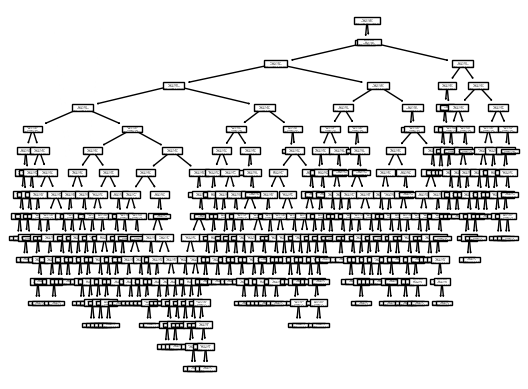

In [30]:
from sklearn import tree
tree.plot_tree(dt1)

[Text(0.7148356958762887, 0.9705882352941176, 'x[7] <= -0.616\nentropy = 1.718\nsamples = 9072\nvalue = [3009, 3000, 2, 2829, 232]'),
 Text(0.7107119845360824, 0.9117647058823529, 'entropy = 0.0\nsamples = 3009\nvalue = [3009, 0, 0, 0, 0]'),
 Text(0.7189594072164949, 0.9117647058823529, 'x[1] <= 1.071\nentropy = 1.199\nsamples = 6063\nvalue = [0, 3000, 2, 2829, 232]'),
 Text(0.5276095360824742, 0.8529411764705882, 'x[1] <= -0.348\nentropy = 1.196\nsamples = 4841\nvalue = [0, 2844, 2, 1763, 232]'),
 Text(0.3155283505154639, 0.7941176470588235, 'x[0] <= 0.604\nentropy = 1.093\nsamples = 2429\nvalue = [0, 968, 0, 1414, 47]'),
 Text(0.13234536082474227, 0.7352941176470589, 'x[7] <= 0.61\nentropy = 0.778\nsamples = 1603\nvalue = [0, 369, 0, 1234, 0]'),
 Text(0.034536082474226806, 0.6764705882352942, 'x[0] <= -0.623\nentropy = 0.439\nsamples = 805\nvalue = [0, 73, 0, 732, 0]'),
 Text(0.020618556701030927, 0.6176470588235294, 'x[2] <= -0.897\nentropy = 0.063\nsamples = 404\nvalue = [0, 3, 0, 

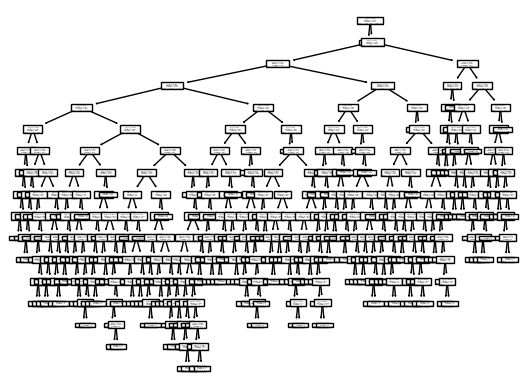

In [31]:
from sklearn import tree
tree.plot_tree(dt2)

# kneighbour

In [32]:
from sklearn.neighbors import KNeighborsClassifier
kmn=KNeighborsClassifier()
kmn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [33]:
x_train_pred=kmn.predict(x_train_sc)
x_test_pred=kmn.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))


training accuracy: 0.9563492063492064
testing accuracy: 0.8994341563786008


# guassian naive bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_sc,y_train)

GaussianNB()

In [35]:
x_train_pred=nb.predict(x_train_sc)
x_test_pred=nb.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.6374559082892416
testing accuracy: 0.5082304526748971


# majority voting

In [36]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('p', Perceptron()),('lr', LogisticRegression()),( 'dt2', DecisionTreeClassifier()),( 'svc2', SVC())])
vc.fit(x_train_sc,y_train)

x_train_pred=vc.predict(x_train_sc)
x_test_pred=vc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

C:\Users\SHASHANK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training accuracy: 0.8824955908289241
testing accuracy: 0.8804012345679012


# random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=10)
rfc.fit(x_train_sc,y_train)

x_train_pred=rfc.predict(x_train_sc)
x_test_pred=rfc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))


training accuracy: 0.9993386243386243
testing accuracy: 0.9642489711934157


# ada boost classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train_sc,y_train)

x_train_pred=abc.predict(x_train_sc)
x_test_pred=abc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))


training accuracy: 0.8169091710758377
testing accuracy: 0.8243312757201646


# gradient boosting classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(x_train_sc,y_train)

x_train_pred=gbc.predict(x_train_sc)
x_test_pred=gbc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))


training accuracy: 0.9847883597883598
testing accuracy: 0.9789094650205762


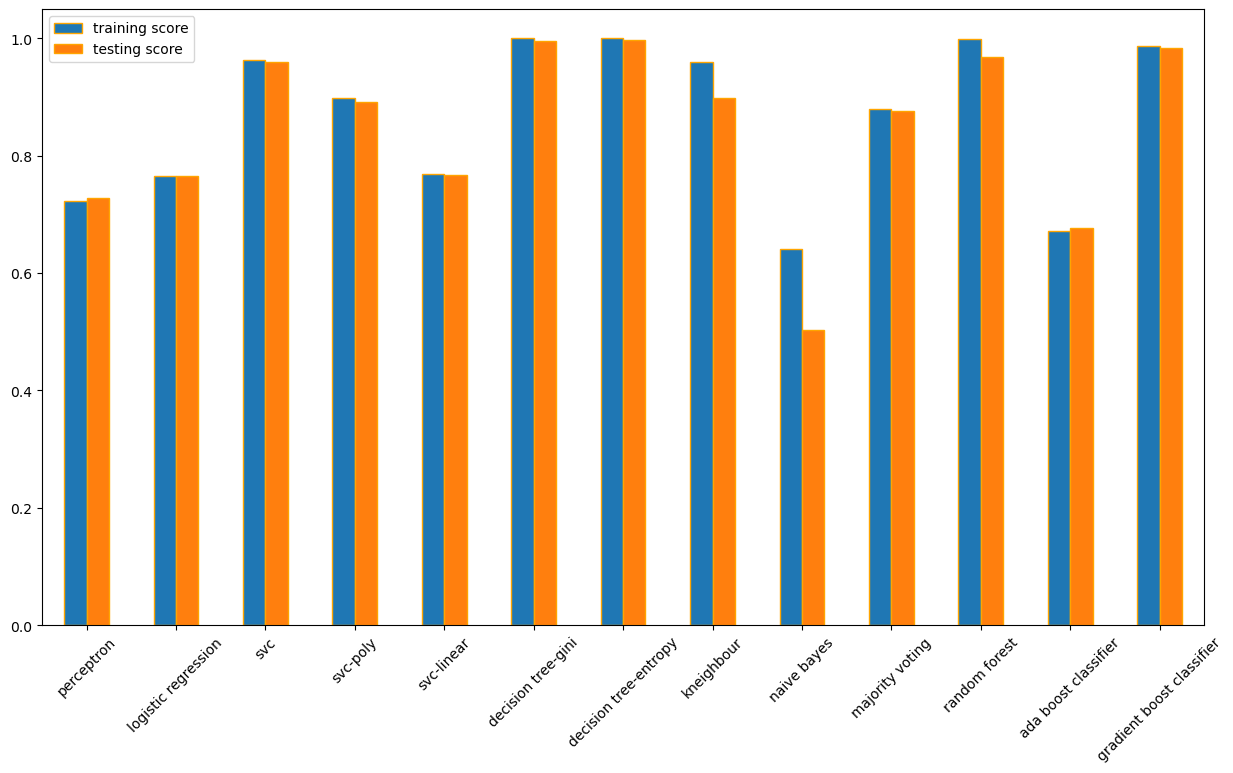

In [40]:
import matplotlib.pyplot as plt

plotdata = pd.DataFrame({

    "training score":[0.722663139329806,0.7659832451499118,0.9627425044091711,0.8978174603174603,0.7686287477954145,
                    1.0,1.0,0.958994708994709,0.6413139329805997, 0.8792989417989417,0.9991181657848325,
                     0.6714065255731922,0.9869929453262787],

    "testing score":[0.7271090534979424,0.7662037037037037,0.9593621399176955,0.8909465020576132,0.7664609053497943,
                     0.9958847736625515,0.9963991769547325,0.8989197530864198,0.503343621399177,0.8765432098765432,
                     0.9683641975308642,0.6766975308641975,0.9830246913580247],},

    index=["perceptron","logistic regression","svc","svc-poly","svc-linear","decision tree-gini","decision tree-entropy",
           "kneighbour","naive bayes","majority voting","random forest","ada boost classifier","gradient boost classifier"])

plotdata.plot(kind="bar",edgecolor="orange",figsize=(15, 8))
plt.xticks(rotation=45)
plt.show()